In [146]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [147]:
iris_set1 = sns.load_dataset("iris")
my_set = iris_set1.query("species == 'setosa' | species == 'versicolor'")
setosa_set = my_set.query("species == 'setosa'")
setosa_set = setosa_set.iloc[:, 0:4].to_numpy()
versi_set = my_set.query("species == 'versicolor'")
versi_set = versi_set.iloc[:, 0:4].to_numpy()

In [148]:
setosa_sepal_petal = [[], []]
for i in setosa_set:
    setosa_sepal_petal[0].append((i[0]))
    setosa_sepal_petal[1].append((i[2]))
    
    

In [149]:
versi_sepal_petal = [[], []]
for i in versi_set:
    versi_sepal_petal[0].append((i[0]))
    versi_sepal_petal[1].append((i[2]))

In [150]:
rectangles = setosa_sepal_petal
triangles = versi_sepal_petal

In [151]:
mean_rectangles = np.mean(rectangles,axis=1).reshape(2,1) # Creates a 2x1 vector consisting of the means of the dimensions 
mean_triangles = np.mean(triangles,axis=1).reshape(2,1)

In [152]:
scatter_rectangles = np.dot((rectangles-mean_rectangles),(rectangles-mean_rectangles).T)
print(scatter_rectangles)
scatter_triangles = np.dot((triangles-mean_triangles),(triangles-mean_triangles).T)
print(scatter_triangles)

[[6.0882 0.8014]
 [0.8014 1.4778]]
[[13.0552  8.962 ]
 [ 8.962  10.82  ]]


In [153]:
SW = scatter_triangles+scatter_rectangles
SW1=np.linalg.inv(SW)
w=np.dot(SW1,mean_rectangles-mean_triangles)

[[ 0.11335687]
 [-0.31751601]]


C:\Users\rsoko\AppData\Local\Temp/ipykernel_4116/2576739780.py:6: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(mean_rectangles[0],mean_rectangles[1],marker='x',c='red',edgecolor='black')
C:\Users\rsoko\AppData\Local\Temp/ipykernel_4116/2576739780.py:7: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(mean_triangles[0],mean_triangles[1],marker='x',c='red',edgecolor='black')
C:\Users\rsoko\AppData\Local\Temp/ipykernel_4116/2576739780.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(mean[0],mean[1],marker='x',c='red

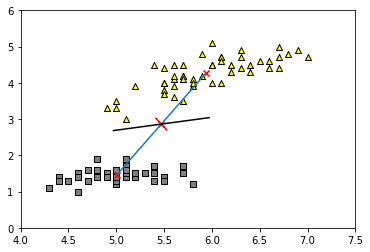

In [154]:
fig, ax = plt.subplots()

ax.scatter(rectangles[0],rectangles[1],marker='s',c='grey',edgecolor='black')
ax.scatter(triangles[0],triangles[1],marker='^',c='yellow',edgecolor='black')

ax.scatter(mean_rectangles[0],mean_rectangles[1],marker='x',c='red',edgecolor='black')
ax.scatter(mean_triangles[0],mean_triangles[1],marker='x',c='red',edgecolor='black')

ax.plot((mean_rectangles[0],mean_triangles[0]), (mean_rectangles[1],mean_triangles[1] ))

mean=(mean_rectangles+mean_triangles)/2
mean1=mean+w/2
mean2=mean-w/2
ax.scatter(mean[0],mean[1],marker='x',c='red',edgecolor='black')
ax.plot((mean1[0],mean2[0]), (mean1[1],mean2[1] ), c='red' )
ax.set_xlim([4, 7.5])         
ax.set_ylim([0, 6]) 
c=-w[0]/w[1]
u=np.array([1,c[0]]).reshape(2,1)
mean1=mean+u/2
mean2=mean-u/2
ax.plot((mean1[0],mean2[0]), (mean1[1],mean2[1] ), c='black' )

print(w)
plt.show()
